# EDA & Model 1

## Import Modules and Show Base Model

In [45]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from mpl_toolkits.mplot3d import Axes3D

In [46]:
# Import cleaned data
df = pd.read_csv('../.CSVs/.clean_kc.csv')

In [47]:
outcome = 'price'
x_cols = df.drop(['price','date','zipcode','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.696      
Dependent Variable:        price                  AIC:                      598700.3202
Date:                      2020-07-26 13:39       BIC:                      598836.2634
No. Observations:          21953                  Log-Likelihood:           -2.9933e+05
Df Model:                  16                     F-statistic:              3137.      
Df Residuals:              21936                  Prob (F-statistic):       0.00       
R-squared:                 0.696                  Scale:                    4.0854e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -36953497.4298 1582529.9785 -23.3509 0.0000 -40055370.3443 -33851624.5152
bedrooms         -33624.6656    1885.5297 -17.8330 0.0000    -37320.4398    -29928.8913
bathrooms         41244.7361    3252.2842  12.6818 0.0000     34870.0244     47619.4478
sqft_living         108.0884       2.2728  47.5569 0.0000       103.6335       112.5433
sqft_lot              0.1319       0.0481   2.7428 0.0061         0.0376         0.2261
floors              443.0138    3583.6622   0.1236 0.9016     -6581.2227      7467.2503
waterfront       588539.2301   17414.6870  33.7956 0.0000    554405.1873    622673.2728
view              49424.1404    2127.8956  23.2268 0.0000     45253.3114     53594.9693
condition         30963.1051    2316.9587  13.3637 0.0000     26421.6990     35504.5113
grade             97842.6559    2150.8403  45.4904 0.0000     93626.8536    102058.4581
sqft_above           71.0689       2.2510  31.5723 0.0000        66.6568        75.4810
sqft_basement        37.0203       2.6419  14.0129 0.0000        31.8420        42.1986
yr_built          -2455.3322      71.8545 -34.1709 0.0000     -2596.1722     -2314.4922
yr_renovated         20.9955       3.6499   5.7524 0.0000        13.8415        28.1495
lat              558707.9479   10444.2220  53.4945 0.0000    538236.5193    579179.3764
long            -118634.9387   11897.6759  -9.9713 0.0000   -141955.2418    -95314.6356
sqft_living15        27.8960       3.4313   8.1298 0.0000        21.1703        34.6217
sqft_lot15           -0.4059       0.0735  -5.5202 0.0000        -0.5501        -0.2618
---------------------------------------------------------------------------------------
Omnibus:                 18806.356         Durbin-Watson:            1.980             
Prob(Omnibus):           0.000             Jarque-Bera (JB):         1913454.621       
Skew:                    3.609             Prob(JB):                 0.000             
Kurtosis:                48.164            Condition No.:            171178810384657280
=======================================================================================
* The condition number is large (2e+17). This might indicate             strong
multicollinearity or other numerical problems.
"""

## Exploratory Data Analysis

In [48]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.195300e+04,2.195300e+04,21953.000000,21953.000000,21953.000000,2.195300e+04,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000
mean,4.579221e+09,5.382084e+05,3.371703,2.110645,2074.745638,1.504273e+04,1.490366,0.007425,0.232679,3.407826,7.648157,1783.510500,291.235139,1970.815652,83.816426,98078.111238,47.559884,-122.214381,1983.094930,12723.667881
std,2.876782e+09,3.663955e+05,0.928005,0.769513,916.716574,4.117921e+04,0.538881,0.085850,0.764840,0.651645,1.175754,825.902051,442.250389,29.350464,400.329207,53.586574,0.138473,0.140590,684.642946,27133.790178
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.122059e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470600,-122.329000,1480.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571300,-122.232000,1830.000000,7620.000000
75%,7.312000e+09,6.410000e+05,4.000000,2.500000,2540.000000,1.066600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10080.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


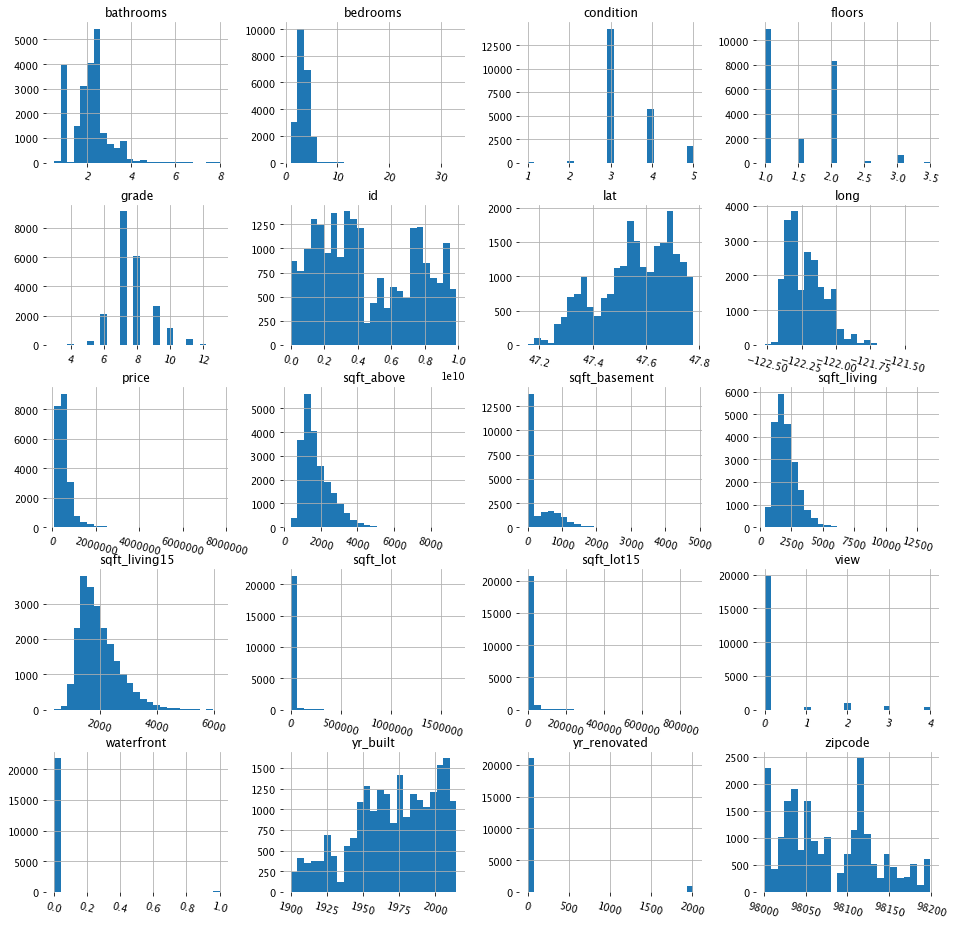

In [49]:
#Let's chart every variable to get an idea of what distributions look like:
h = df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

## Preemptive Feature-engineering:

In [50]:
# Break out the date category into multiple new categories and build a variable for age. 
df['date'] = pd.to_datetime(df['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['age'] = df['year'] - df['yr_built']

In [51]:
# Build a variable that ages the most recent renovation:
df['reno_age'] = df['year'] - df['yr_renovated']
df['reno_age'] = df['reno_age'].replace({2014: 0, 2015: 0})

# Categorical Variables

### As expected, there are quite a few categorical variables so for these we might be able to gain some information from boxplots comparing these variables to price. 

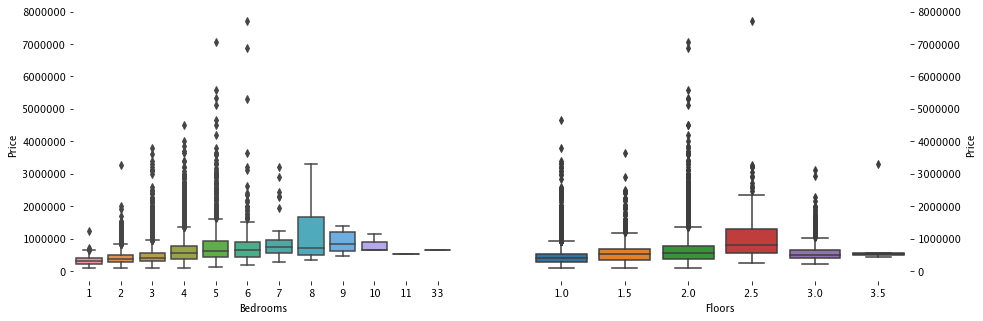

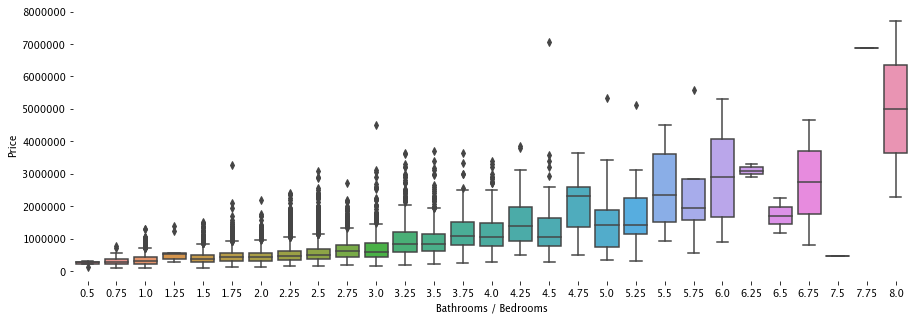

In [52]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

### Doesn't look like there's a strong linear relationship here but maybe some of them are related with oneanother - can you say 3d visualizations? 

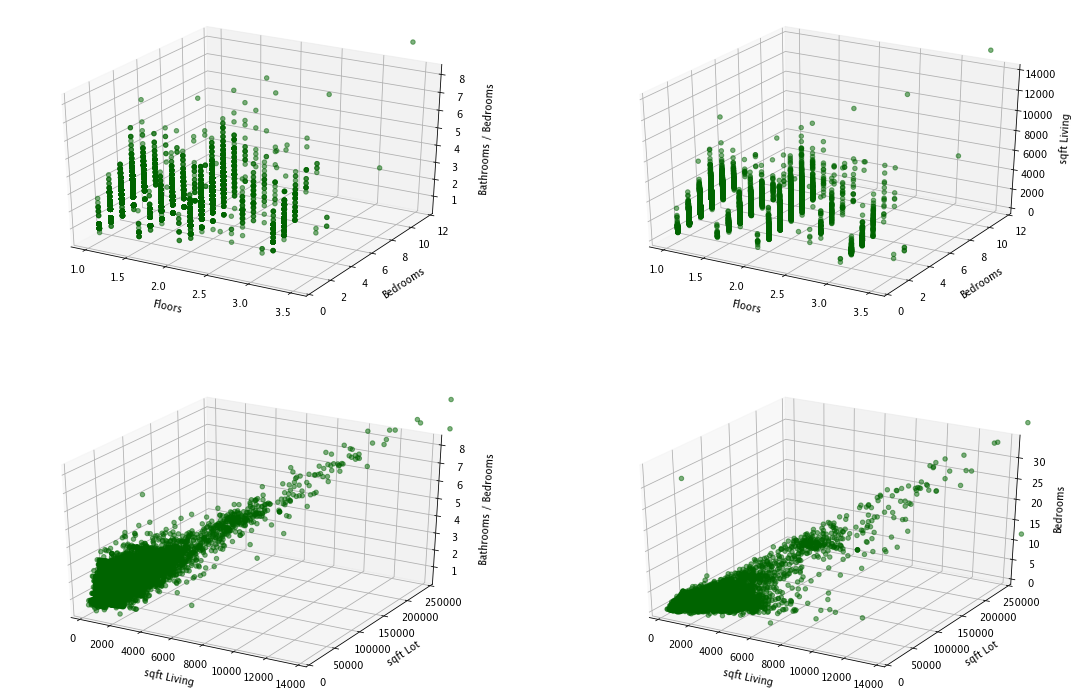

In [53]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(df['floors'],df['bedrooms'],df['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],c="darkgreen",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000]);

Interesting but a little unnecessary at this point as we will want to asses these relationships later in multicolinear relationships within our model.

### Let's look at other categoricals for relationship with price before we decide to dummy them out: 

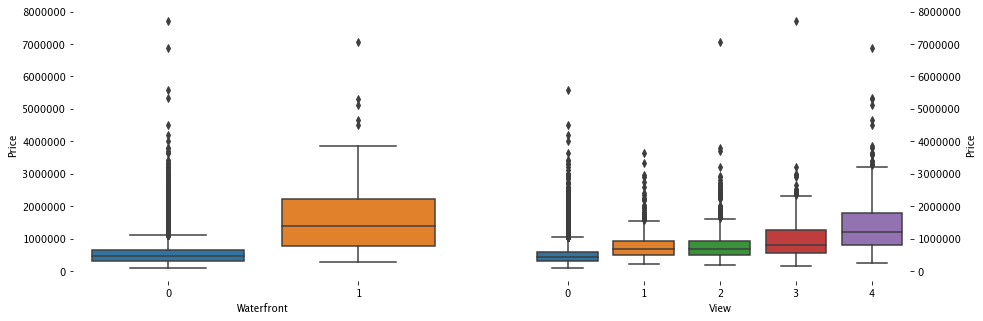

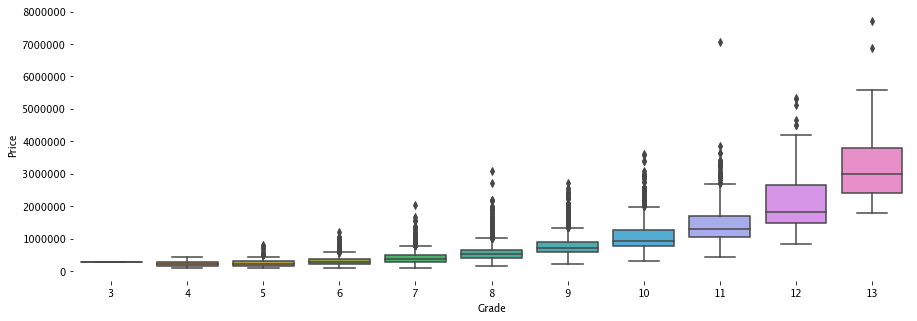

In [54]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

In [55]:
### Let's build a function to convert categorical variables:
def binary_transform(df, col, colrename):
    df_clone = df.copy()
    df_clone[colrename] = df_clone[col]
    for idx in range(df_clone.shape[0]):
        if df_clone.loc[idx,colrename] >= 1:
            df_clone.loc[idx,colrename] = 1
        else:
            df_clone.loc[idx,colrename] = 0
    
    return df_clone

In [56]:
binars = ['floors','waterfront','yr_renovated','sqft_basement']
converts = ['multiple_stories','on_water','renovated','has_basement']
combo = zip(binars, converts)
for bi, cat in combo:
    df = binary_transform(df, bi, cat)
    df[cat] = df[cat].astype('category')
    df = df.drop([bi], axis=1)

# Continuous Variables:

### Now let's separate and look at strictly continuous variables:

In [57]:
cats = []
conts = []

for col in df.columns:
    if df[col].nunique() <= 75:
        cats.append(col)
    else:
        conts.append(col)
        
print("Categorical Variables: ", cats)
print("Continuous Variables: ", conts)

Categorical Variables:  ['bedrooms', 'bathrooms', 'view', 'condition', 'grade', 'zipcode', 'year', 'month', 'reno_age', 'multiple_stories', 'on_water', 'renovated', 'has_basement']
Continuous Variables:  ['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age']


,id,price,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,age
count,2.195300e+04,2.195300e+04,21953.000000,2.195300e+04,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000,21953.000000
mean,4.579221e+09,5.382084e+05,2074.745638,1.504273e+04,1783.510500,1970.815652,47.559884,-122.214381,1983.094930,12723.667881,43.508996
std,2.876782e+09,3.663955e+05,916.716574,4.117921e+04,825.902051,29.350464,0.138473,0.140590,684.642946,27133.790178,29.353517
min,1.000102e+06,7.800000e+04,370.000000,5.200000e+02,370.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000
25%,2.122059e+09,3.200000e+05,1420.000000,5.050000e+03,1190.000000,1951.000000,47.470600,-122.329000,1480.000000,5100.000000,18.000000
50%,3.904940e+09,4.500000e+05,1910.000000,7.620000e+03,1560.000000,1974.000000,47.571300,-122.232000,1830.000000,7620.000000,40.000000
75%,7.312000e+09,6.410000e+05,2540.000000,1.066600e+04,2200.000000,1996.000000,47.677900,-122.126000,2360.000000,10080.000000,63.000000
max,9.900000e+09,7.700000e+06,13540.000000,1.651359e+06,9410.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


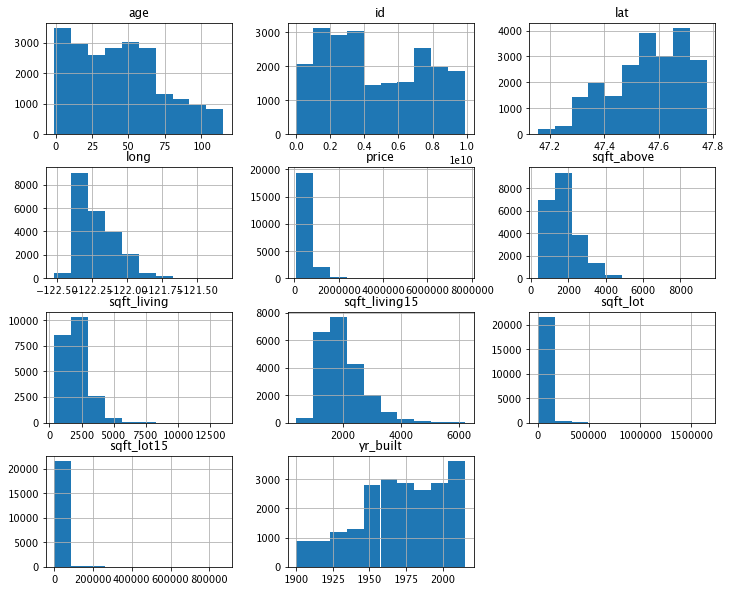

In [58]:
df_conts = df.loc[:,conts]
df_conts.hist(figsize=(12,10))
df_conts.describe()

These don't look good - let's clean some of them up with log transformation:

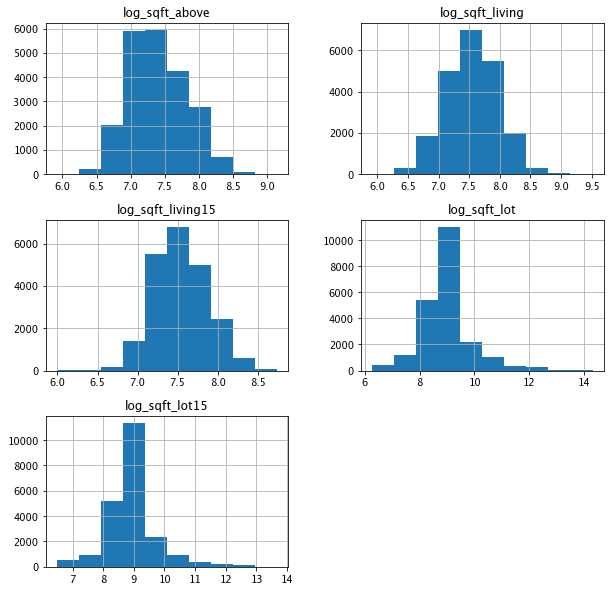

In [59]:
log_sqft_living = np.log(df['sqft_living'])
log_sqft_lot = np.log(df['sqft_lot'])
log_sqft_above = np.log(df['sqft_above'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_sqft_lot15 = np.log(df['sqft_lot15'])

logs = ['log_sqft_above', 'log_sqft_living', 'log_sqft_living15' , 'log_sqft_lot', 'log_sqft_lot15']

df['log_sqft_above'] = log_sqft_above
df['log_sqft_living'] = log_sqft_living
df['log_sqft_living15'] = log_sqft_living15
df['log_sqft_lot'] = log_sqft_lot
df['log_sqft_lot15'] = log_sqft_lot15

df[logs].hist(figsize=(10,10));

In [60]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,...,sqft_lot15,year,month,age,reno_age,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
id,1.000000,-0.013248,0.002091,0.006927,-0.009744,-0.130428,0.012871,-0.022571,0.011795,-0.008751,...,-0.136807,0.009560,-0.012083,-0.022414,-0.015792,0.000891,0.001084,-0.000592,-0.148263,-0.146079
price,-0.013248,1.000000,0.307332,0.526311,0.702583,0.091720,0.398352,0.039251,0.668972,0.606385,...,0.084039,0.004819,-0.011321,-0.057828,0.065860,0.544055,0.612766,0.545834,0.161531,0.147653
bedrooms,0.002091,0.307332,1.000000,0.512809,0.576553,0.032439,0.079991,0.027732,0.353793,0.477732,...,0.030931,-0.009239,-0.002316,-0.156649,-0.009102,0.514609,0.620591,0.403308,0.183350,0.161001
bathrooms,0.006927,0.526311,0.512809,1.000000,0.756237,0.089552,0.190448,-0.120583,0.666380,0.687341,...,0.089385,-0.027885,0.007637,-0.509367,-0.002897,0.696706,0.762708,0.572875,0.100350,0.091595
sqft_living,-0.009744,0.702583,0.576553,0.756237,1.000000,0.175168,0.286396,-0.054889,0.763365,0.876282,...,0.185347,-0.030421,0.012122,-0.321562,0.019624,0.843149,0.954631,0.732255,0.343876,0.320035
sqft_lot,-0.130428,0.091720,0.032439,0.089552,0.175168,1.000000,0.074304,-0.008126,0.116851,0.185980,...,0.719120,0.005443,-0.002420,-0.054105,0.013974,0.164975,0.151252,0.146706,0.639053,0.550728
view,0.012871,0.398352,0.079991,0.190448,0.286396,0.074304,1.000000,0.047877,0.254511,0.169027,...,0.072326,0.000343,-0.005244,0.050276,0.091212,0.160208,0.248411,0.266180,0.121039,0.118383
condition,-0.022571,0.039251,0.027732,-0.120583,-0.054889,-0.008126,0.047877,1.000000,-0.139422,-0.153692,...,-0.002449,-0.045321,0.021485,0.353753,-0.006534,-0.144655,-0.044118,-0.084438,0.073275,0.079654
grade,0.011795,0.668972,0.353793,0.666380,0.763365,0.116851,0.254511,-0.139422,1.000000,0.755752,...,0.122810,-0.032883,0.009461,-0.451512,-0.023482,0.742829,0.743725,0.690319,0.184416,0.184910
sqft_above,-0.008751,0.606385,0.477732,0.687341,0.876282,0.185980,0.169027,-0.153692,0.755752,1.000000,...,0.196332,-0.025303,0.010668,-0.426474,0.009554,0.962594,0.832128,0.701203,0.331070,0.311512


In [61]:
abs(df.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,...,sqft_lot15,year,month,age,reno_age,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
sqft_living,False,False,False,True,True,False,False,False,True,True,...,False,False,False,False,False,True,True,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,False,True,True,...,False,False,False,False,False,True,True,False,False,False


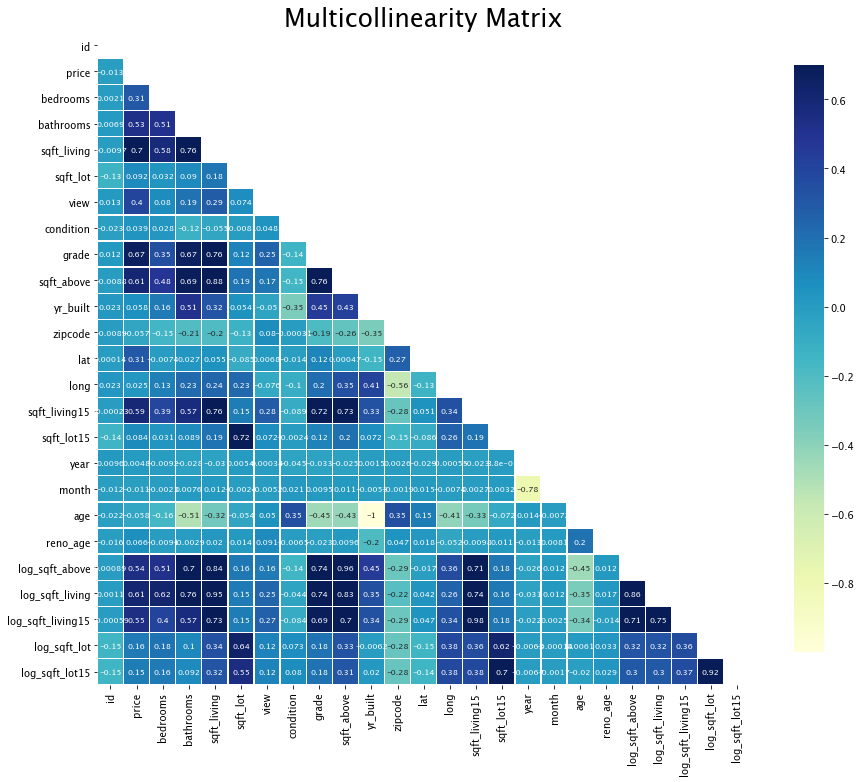

In [62]:
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Multicollinearity Matrix',fontsize=25)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="YlGnBu", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

sqft_living15 shows high collinearity with sqft_living and that is all we'll remove right now.

## Initial Model Building

In [63]:
dfmod = df[[
 'id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'month',
 'year',
 'age',
 'reno_age',
 'multiple_stories',
 'on_water',
 'renovated',
 'has_basement',
 'log_sqft_living']].copy()


In [64]:
outcome = 'price'
x_cols = dfmod.drop(['id','price','date'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=dfmod).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
============================================================================================
Model:                      OLS                      Adj. R-squared:             0.662      
Dependent Variable:         price                    AIC:                        601030.9858
Date:                       2020-07-26 13:41         BIC:                        601166.9290
No. Observations:           21953                    Log-Likelihood:             -3.0050e+05
Df Model:                   16                       F-statistic:                2683.      
Df Residuals:               21936                    Prob (F-statistic):         0.00       
R-squared:                  0.662                    Scale:                      4.5430e+10 
--------------------------------------------------------------------------------------------
                      Coef.         Std.Err.      t     P>|t|      [0.025         0.975]    
--------------------------------------------------------------------------------------------
Intercept         -65027947.8322 10446622.1232  -6.2248 0.0000 -85504080.7662 -44551814.8981
on_water[T.1]        613032.9068    18368.9934  33.3732 0.0000    577028.3547    649037.4589
renovated[T.1]        83898.4210    11421.5867   7.3456 0.0000     61511.2871    106285.5549
has_basement[T.1]    -16770.5229     3352.0491  -5.0031 0.0000    -23340.7811    -10200.2648
bedrooms             -16703.3526     2063.1779  -8.0959 0.0000    -20747.3301    -12659.3751
bathrooms             88957.4053     3279.9226  27.1218 0.0000     82528.5204     95386.2901
view                  63636.9121     2196.6146  28.9704 0.0000     59331.3890     67942.4352
condition             22982.1986     2449.9377   9.3807 0.0000     18180.1439     27784.2532
grade                145060.2562     2076.7369  69.8501 0.0000    140989.7020    149130.8104
yr_built              11435.4096     1653.1118   6.9175 0.0000      8195.1911     14675.6280
zipcode                -581.7362       34.2752 -16.9725 0.0000      -648.9180      -514.5544
lat                  593632.4093    11220.1451  52.9077 0.0000    571640.1155    615624.7030
long                -131269.4320    13348.4969  -9.8340 0.0000   -157433.4488   -105105.4152
month                  1705.5383      742.5345   2.2969 0.0216       250.1172      3160.9594
year                  26110.5999     3304.4468   7.9017 0.0000     19633.6459     32587.5540
age                   14675.1895     1652.1470   8.8825 0.0000     11436.8622     17913.5168
reno_age              -3015.5861      454.2237  -6.6390 0.0000     -3905.8973     -2125.2749
log_sqft_living      163023.9015     7215.0835  22.5949 0.0000    148881.8174    177165.9857
--------------------------------------------------------------------------------------------
Omnibus:                  21612.678           Durbin-Watson:              1.968             
Prob(Omnibus):            0.000               Jarque-Bera (JB):           3621953.023       
Skew:                     4.401               Prob(JB):                   0.000             
Kurtosis:                 65.307              Condition No.:              594129969042491904
============================================================================================
* The condition number is large (6e+17). This might indicate             strong
multicollinearity or other numerical problems.
"""

### That's a good start - let's try building a season feature and categorizing zip code to see if that helps anything:

In [65]:
dfmod['spring'] = dfmod.month.loc[(dfmod['month'] > 2) &  (dfmod['month'] < 6)]
dfmod['spring'] = dfmod['spring'] > 1
dfmod['summer'] = dfmod.month.loc[(dfmod['month'] > 5) &  (dfmod['month'] < 9)]
dfmod['summer'] = dfmod['summer'] > 1

In [66]:
dfmod['day_of_year'] = dfmod['date'].dt.dayofyear

In [68]:
zip_dummies = pd.get_dummies(dfmod['zipcode'],prefix='zip')

In [69]:
zip_mod = pd.concat([dfmod, zip_dummies], axis=1)

Now I want to remove some more zips - only include those with the highest coefficients 

In [74]:
# coefs = model.params
# coefs = coefs.sort_values(ascending = False)
# coefs = dict(coefs)
# coefs = list(coefs.keys())

In [75]:
# The top ten zipcodes were determined with the block above
top_ten_zips = zip_mod[['zip_98039',
 'zip_98004',
 'zip_98112',
 'zip_98040',
 'zip_98102',
 'zip_98199',
 'zip_98109',
 'zip_98105',
 'zip_98119',
 'zip_98115',]]
slim_zips = zip_mod = pd.concat([dfmod, top_ten_zips], axis=1)

In [76]:
outcome = 'price'
x_cols = slim_zips.drop(['id','price','date', 'day_of_year', 'lat','long'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=slim_zips).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
============================================================================================
Model:                      OLS                      Adj. R-squared:             0.710      
Dependent Variable:         price                    AIC:                        597632.7640
Date:                       2020-07-26 13:41         BIC:                        597848.6738
No. Observations:           21953                    Log-Likelihood:             -2.9879e+05
Df Model:                   26                       F-statistic:                2071.      
Df Residuals:               21926                    Prob (F-statistic):         0.00       
R-squared:                  0.711                    Scale:                      3.8897e+10 
--------------------------------------------------------------------------------------------
                      Coef.         Std.Err.      t    P>|t|       [0.025         0.975]    
--------------------------------------------------------------------------------------------
Intercept         -94997665.1458 12099726.6876 -7.8512 0.0000 -118714002.8704 -71281327.4213
on_water[T.1]        621331.7118    17009.0262 36.5295 0.0000     587992.7926    654670.6309
renovated[T.1]        45049.6970    10573.7517  4.2605 0.0000      24324.3804     65775.0136
has_basement[T.1]    -11682.4871     3047.6700 -3.8333 0.0001     -17656.1403     -5708.8339
spring[T.True]        22923.9932     3813.7509  6.0109 0.0000      15448.7661     30399.2203
summer[T.True]        18298.2631     3979.6674  4.5979 0.0000      10497.8278     26098.6985
bedrooms             -18583.5807     1908.2242 -9.7387 0.0000     -22323.8379    -14843.3236
bathrooms             81319.2594     3045.7368 26.6994 0.0000      75349.3953     87289.1234
view                  60398.6712     2033.4438 29.7027 0.0000      56412.9745     64384.3679
condition             15745.1568     2271.1561  6.9327 0.0000      11293.5269     20196.7867
grade                136508.8379     1925.5015 70.8952 0.0000     132734.7159    140282.9599
yr_built              12603.4502     1938.8356  6.5005 0.0000       8803.1925     16403.7078
zipcode                 112.3804       29.2190  3.8461 0.0001         55.1091       169.6517
month                  4082.0256      822.8406  4.9609 0.0000       2469.1985      5694.8526
year                  28046.9770     3876.5121  7.2351 0.0000      20448.7335     35645.2206
age                   15443.5269     1938.2740  7.9677 0.0000      11644.3700     19242.6838
reno_age              -2548.2283      420.4416 -6.0608 0.0000      -3372.3242     -1724.1324
log_sqft_living      160833.5742     6571.8442 24.4731 0.0000     147952.2852    173714.8632
zip_98039           1191147.4264    27550.0508 43.2358 0.0000    1137147.3381   1245147.5147
zip_98004            640644.8574    11386.0177 56.2659 0.0000     618327.4408    662962.2740
zip_98112            367012.2171    12360.7835 29.6917 0.0000     342784.1891    391240.2450
zip_98040            351171.8259    12060.4041 29.1177 0.0000     327532.5633    374811.0885
zip_98102            251692.9091    19549.1427 12.8749 0.0000     213375.1783    290010.6398
zip_98199            153764.8544    11712.9880 13.1277 0.0000     130806.5525    176723.1563
zip_98109            230423.6687    19080.9085 12.0761 0.0000     193023.7108    267823.6267
zip_98105            228533.7390    13293.5273 17.1914 0.0000     202477.4660    254590.0120
zip_98119            205249.7954    14790.7456 13.8769 0.0000     176258.8663    234240.7245
zip_98115            128461.8709     8341.9243 15.3995 0.0000     112111.0972    144812.6446
--------------------------------------------------------------------------------------------
Omnibus:                   19111.905           Durbin-Watson:              1.974            
Prob(Omnibus):             0.000               Jarque-Bera (JB):           2

## Check for Multi Colinearity Again

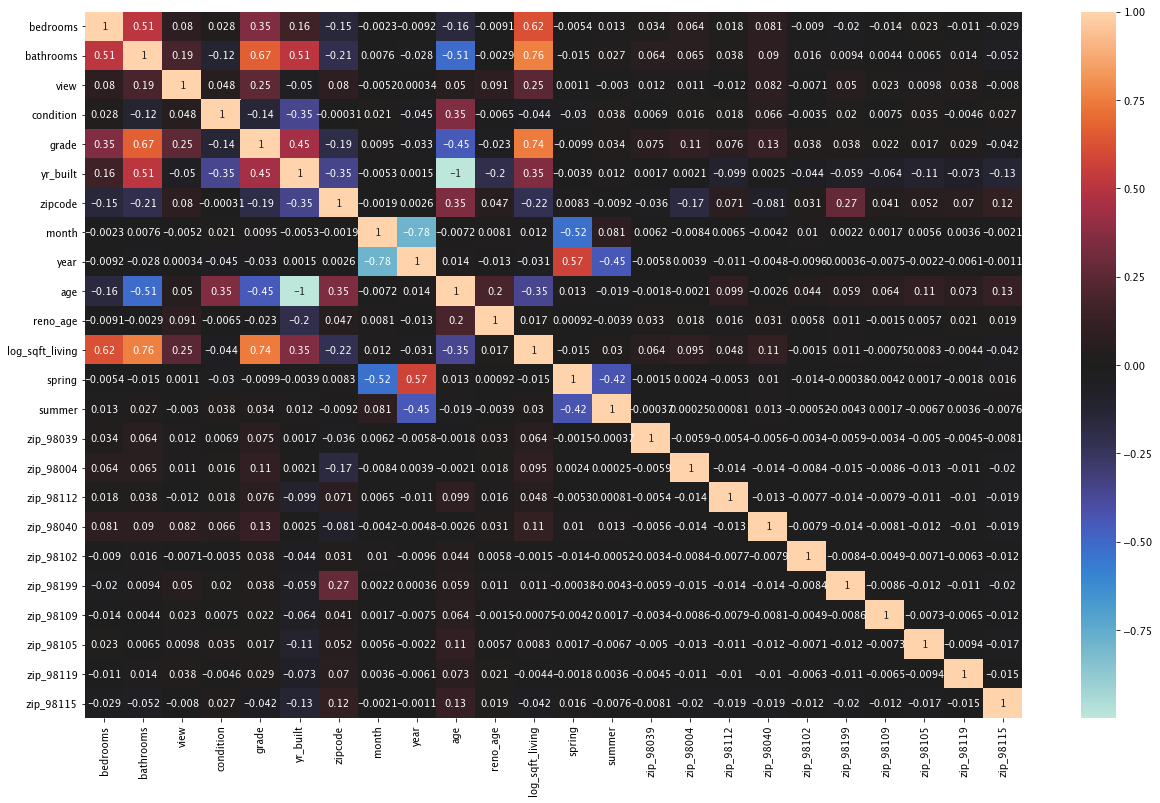

In [77]:
corr2 = slim_zips[x_cols].corr()
#abs(slim_zips.corr())>.75
plt.figure(figsize=(21,13))
sns.heatmap(corr2, center=0, annot=True);

The relationship between log_sqft_living and bathrooms is just over our threshold but we'll go ahead and keep it in.

## Check the Normality Assumption

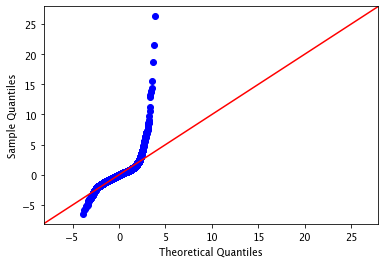

In [78]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

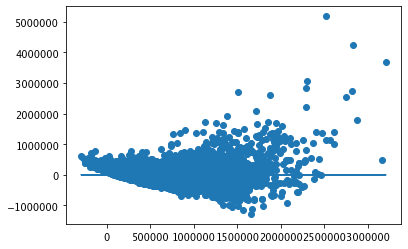

In [79]:
plt.scatter(model.predict(slim_zips[x_cols]), model.resid)
plt.plot(model.predict(slim_zips[x_cols]), [0 for i in range(len(slim_zips))])

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = slim_zips
y = data['price']
X = data.drop(['price','date','id','zipcode'], axis = 1)

In [81]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [82]:
len(y_test)

4391

In [83]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 34865414765.832504
Test Mean Squarred Error: 32943220443.345585


In [84]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 186722.82872169782
Test Root Mean Squarred Error: 181502.67337795766


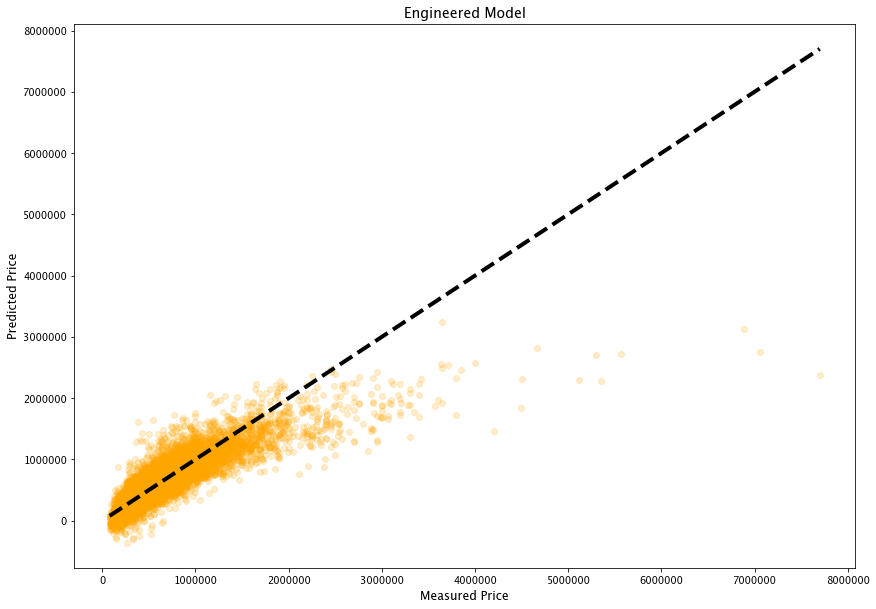

In [85]:
predicted = cross_val_predict(linreg, X, y, cv=10)

plt.figure(figsize = (14,10))
plt.scatter(y, predicted, alpha=0.2, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured Price', size=12)
plt.ylabel('Predicted Price', size=12)
plt.title("Engineered Model", size=14)
plt.show();

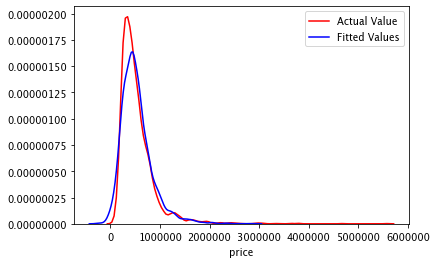

In [86]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1);

These checks for the normality assumption look absolutely terrible. Seems like we'll have to take a different approach with this data in the next notebook.

In [88]:
dfmod.to_csv('../.CSVs/.post_eda.csv')
slim_zips.to_csv('../.CSVs/.zip_inclusion.csv')